In [213]:
#Mount drive
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


In [214]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV

[0.87450354]
[-0.05372522]


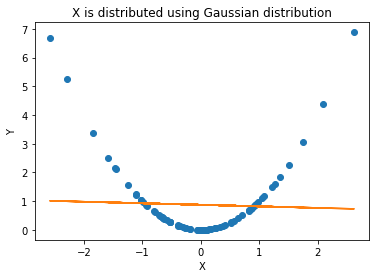

In [215]:
#1b
#Gaussian distributed X with Y=X^2
X=np.random.normal(0,1,100)
Y=X**2
X=X.reshape(X.shape[0],1)
Y=Y.reshape(Y.shape[0],1)

#Create and fit linear regression line
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("X is distributed using Gaussian distribution")
    print(a0)
    print(a1)

[-0.18511417]
[1.05439471]


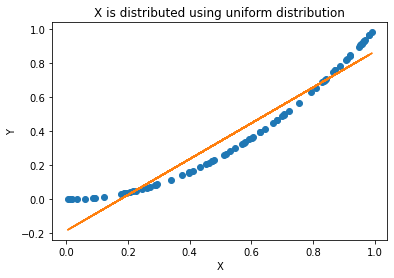

In [216]:
#1b (explanation in PDF)
#Uniform distributed X with Y=X^2
X=np.random.uniform(0,1,100)
Y=X**2
X=X.reshape(X.shape[0],1)
Y=Y.reshape(Y.shape[0],1)

#Create and fit linear regression line
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("X is distributed using uniform distribution")
    print(a0)
    print(a1)

1.7763568394002505e-15
1.9999999999999996


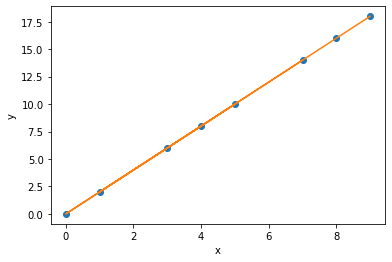

In [217]:
#1d
#Create X_1, X_2, Y, where X_1 and X_2 are negatively correlated, and X_1 and Y are positively correlated
X_1 = np.arange(10)
X_2 = -5*X_1
Y = 2*X_1
X = pd.DataFrame()
X['X_1'] = X_1

if len(X.shape) == 1:
  X = X[:,np.newaxis]

#Single variable linear regression with omitted variable bias
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("x")
    plt.ylabel("y")
    print(a0)
    print(a1)

In [218]:
#1d continued
X['X_2'] = X_2

if len(X.shape) == 1:
  X = X[:,np.newaxis]

#Multivariate linear regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)
print(lm.coef_)
print(lm.intercept_)

[ 0.07692308 -0.38461538]
-1.7763568394002505e-15


In [219]:
#2a
#Load Ascombe's quartet dataset
df1 = pd.read_excel('Anscombe_Quartet.xlsx', 'Data1')
df2 = pd.read_excel('Anscombe_Quartet.xlsx', 'Data2')
df3 = pd.read_excel('Anscombe_Quartet.xlsx', 'Data3')
df4 = pd.read_excel('Anscombe_Quartet.xlsx', 'Data4')
df = pd.concat([df1, df2, df3, df4], axis=1)

In [220]:
#2b
#Print mean and variance of x,y of each of the 4 datasets
mv = pd.DataFrame()
mv["mean"] = df.mean()
mv["Var"] = df.var()
print(mv)

       mean        Var
x  9.000000  11.000000
y  7.500909   4.127269
x  9.000000  11.000000
y  7.500909   4.127629
x  9.000000  11.000000
y  7.500000   4.122620
x  9.000000  11.000000
y  7.500909   4.123249


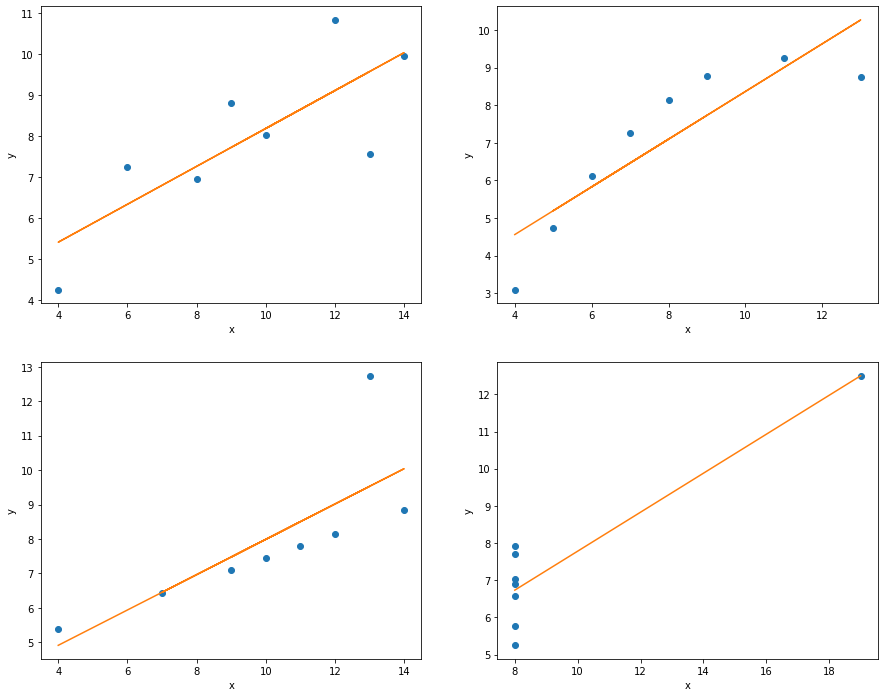

In [221]:
#2b
#Calculate and graph linear regression lines for each of the 4 datasets
fig, axs = plt.subplots(2,2, figsize=(15,12))
features = [df1, df2, df3, df4]

for i in range(4):
  
  df = features[i]
  X = df['x'].values
  Y = df['y'].values

  if len(X.shape) == 1:
    X = X[:,np.newaxis]
  
  #Create linear regression model
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
  lm = LinearRegression()
  lm.fit(X=X_train, y=Y_train)

  #Plot regression models
  if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    n = int(i/2)
    m = i - 2*n
    axs[n, m].plot(X_train, Y_train, 'o')
    axs[n, m].plot(X_train, a1*X_train + a0)
    axs[n, m].set_xlabel('x')
    axs[n, m].set_ylabel('y')

3.5371499380421305
0.4672986369268897


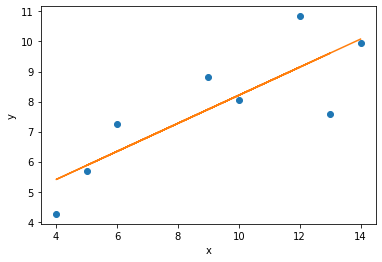

In [222]:
#2c (model explanations in PDF)
#Best model for first dataset: linear model
X = df1['x'].values
Y = df1['y'].values

if len(X.shape) == 1:
  X = X[:,np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("x")
    plt.ylabel("y")
    print(a0)
    print(a1)

[ 0.          2.78091312 -0.12671385]
-5.996087760264566


Text(0, 0.5, 'y')

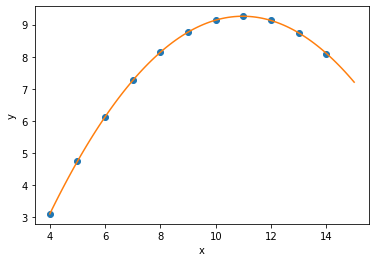

In [223]:
#2c
#Best model for second dataset: quadratic model
X = df2['x'].values
Y = df2['y'].values

if len(X.shape) == 1:
  X = X[:,np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()

poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X_train)
lm.fit(X=X_transform, y=Y_train)

#Plot regression model and print coefficients
print(lm.coef_)
print(lm.intercept_)
X_plot = np.linspace(4,15,100).reshape(-1,1)
X_plot_poly = poly.fit_transform(X_plot)
plt.plot(X,Y,'o')
plt.plot(X_plot_poly[:,1], lm.predict(X_plot_poly))
plt.xlabel("x")
plt.ylabel("y")

[0.         0.09500867 0.02399672]
4.591715634331945


Text(0, 0.5, 'y')

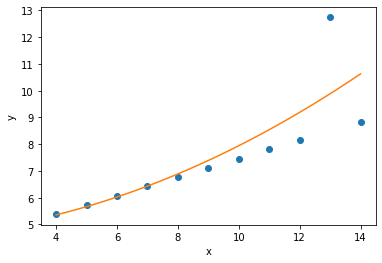

In [224]:
#2c
#Best model for third dataset: quadratic model
X = df3['x'].values
Y = df3['y'].values

if len(X.shape) == 1:
  X = X[:,np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()

poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X_train)
lm.fit(X=X_transform, y=Y_train)

#Plot regression model and print coefficients
print(lm.coef_)
print(lm.intercept_)
X_plot = np.linspace(4,14,100).reshape(-1,1)
X_plot_poly = poly.fit_transform(X_plot)
plt.plot(X,Y,'o')
plt.plot(X_plot_poly[:,1], lm.predict(X_plot_poly))
plt.xlabel("x")
plt.ylabel("y")

2.4916883116883124
0.5267532467532466


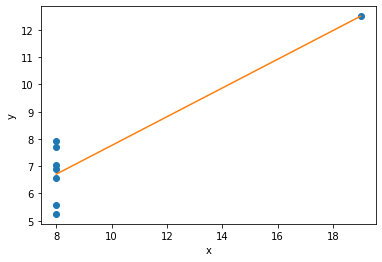

In [225]:
#2c
#Best model for fourth dataset: linear model
X = df4['x'].values
Y = df4['y'].values

if len(X.shape) == 1:
  X = X[:,np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("x")
    plt.ylabel("y")
    print(a0)
    print(a1)

In [226]:
#3a
#Load diabetes dataset, print description
df=sklearn.datasets.load_diabetes(as_frame=True)
print(df['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [227]:
#3a
#Print features
print(df['data'])

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [228]:
#3a
#Print disease progression measure
print(df['target'])

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


age correlation: 0.18788875071891983
sex correlation: 0.0430619984516054
bmi correlation: 0.5864501344746891
bp correlation: 0.4414838489308862
s1 correlation: 0.2120224810145508
s2 correlation: 0.17405358696874249
s3 correlation: -0.39478925067091847
s4 correlation: 0.4304528847447734
s5 correlation: 0.5658834252428094
s6 correlation: 0.3824834842485812


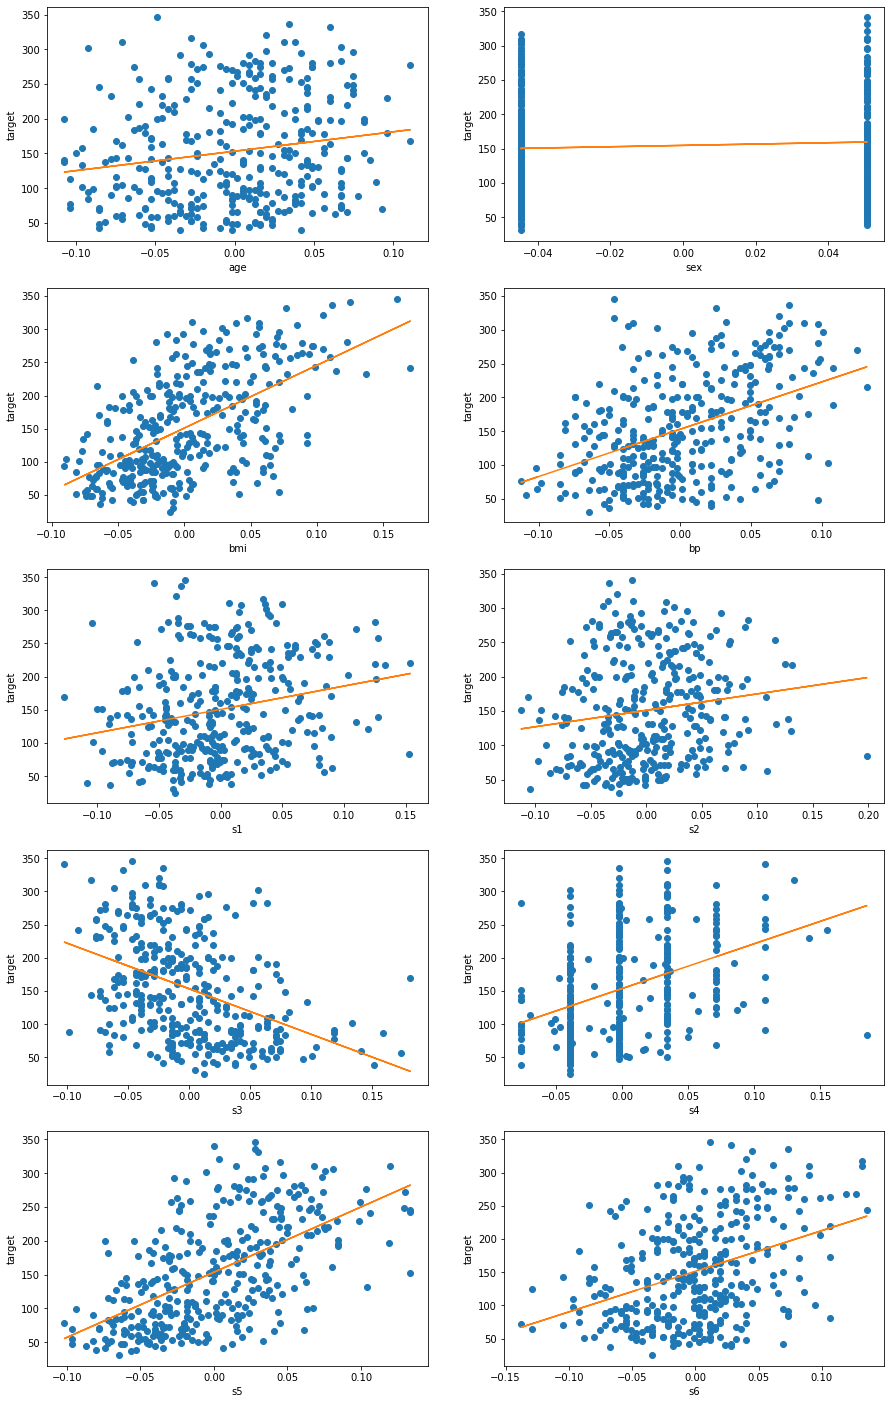

In [229]:
#3b
#Find best single variable linear model based on correlation coefficient
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 2, figsize=(15,25))
features = df['feature_names']

#Calculate coefficient and plot regression line for each feature
for i in range(10):
  
  feature = features[i]
  X = df['data'][feature].values
  Y = df['target'].values

  #Calculate correlation coefficient
  print(feature + ' correlation: ' + str(np.corrcoef(X, Y)[0,1]))

  if len(X.shape) == 1:
    X = X[:,np.newaxis]

  #Calculate and plot regression line
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
  lm = LinearRegression()
  lm.fit(X=X_train, y=Y_train)

  if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    n = int(i/2)
    m = i - 2*n
    axs[n, m].plot(X_train, Y_train, 'o')
    axs[n, m].plot(X_train, a1*X_train + a0)
    axs[n, m].set_xlabel(feature)
    axs[n, m].set_ylabel('target')

151.96953202443024
1016.9823760791338


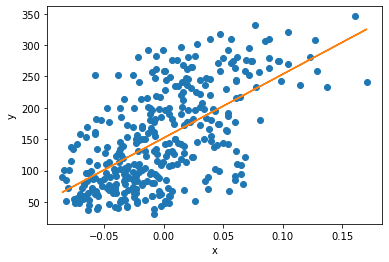

In [230]:
#Best model for first dataset: linear model using bmi
X = df['data']['bmi'].values
Y = df['target'].values

if len(X.shape) == 1:
  X = X[:,np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Plot regression model and print coefficients
if len(lm.coef_)==1:
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    plt.plot(X_train, Y_train, 'o')
    plt.plot(X_train, a1*X_train + a0)
    plt.xlabel("x")
    plt.ylabel("y")
    print(a0)
    print(a1)

In [231]:
#3c
#Find optimal multivariate linear regression model using recursive feature elimination with cross-validation
X = df['data']
print(X.columns)
Y = df['target']

#Train initial linear model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Recursively eliminate unimportant features using cross-validation
rfe = RFECV(lm)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)

#Drop unimportant features
X = X.drop(columns=['age','s3'])

#Create multivariate linear model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

#Print model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[False  True  True  True  True  True  True  True  True False]
[-309.75011732  539.88802812  303.81966314 -513.41983593  229.9511123
  213.04386754  638.33100846   54.95386167]
152.60405402823048
